<a href="https://colab.research.google.com/github/gombergere/arthomas/blob/master/FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Cet exercice est basé sur les deux articles suivants
#https://towardsdatascience.com/this-is-how-reinforcement-learning-works-5080b3a335d6
#https://towardsdatascience.com/dont-ever-ignore-reinforcement-learning-again-4d026ee81371
# Le code des 2 articles a été regroupè dans le même

In [7]:
import gym
from gym.envs.registration import register
import numpy as np
!pip install python

# load 4x4 environment
if 'FrozenLakeNotSlippery-v0' in gym.envs.registry.env_specs:
    del gym.envs.registry.env_specs['FrozenLakeNotSlippery-v0']
register(id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196
)

# load 16x16 environment
if 'FrozenLake8x8NotSlippery-v0' in gym.envs.registry.env_specs:
    del gym.envs.registry.env_specs['FrozenLake8x8NotSlippery-v0']
register(
    id='FrozenLake8x8NotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '8x8', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196
)

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [8]:
import random
def view_states_frozen_lake(env = gym.make('FrozenLakeNotSlippery-v0')):
    print(env.observation_space)
    print()
    env.env.s=random.randint(0,env.observation_space.n-1)
    env.render()
    
view_states_frozen_lake()

Discrete(16)


SFFF
FHFH
FFFH
HFFG


In [9]:
def view_actions_frozen_lake(env = gym.make('FrozenLakeNotSlippery-v0')):
    print(env.action_space)
    print("Possible actions: [0..%a]" % (env.action_space.n-1))
    
view_actions_frozen_lake()

Discrete(4)
Possible actions: [0..3]


In [10]:

def simulate_frozen_lake(env = gym.make('FrozenLakeNotSlippery-v0'), nb_trials=10):
    rew_tot=0
    obs= env.reset()
    env.render()
    for _ in range(nb_trials+1):
        action = env.action_space.sample() # select a random action
        obs, rew, done, info = env.step(action) # perform the action
        rew_tot = rew_tot + rew # calculate the total reward
        env.render() # display the environment
    print("Reward: %r" % rew_tot)  # print the total reward
    
 
simulate_frozen_lake(env = gym.make('FrozenLake8x8NotSlippery-v0'))


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Reward: 0.0


In [0]:
##############################
#Deuxieme article

In [0]:
# using the Bellman equation, we find the action providing the highest value for the given state s. 
# V is the list of values of all states
def choose_best_action(env, V, s, gamma):
    a_best = None
    q_best = float('-inf')
    nb_actions = env.action_space.n
    for a in range (0, nb_actions):
        env.env.s = s # go to state s
        s_next, r, done, info = env.step(a) #take the action a
        q = r + gamma * V[s_next] # compute the value future value after taking action a
        if q > q_best:
            q_best = q
            a_best = a
    return a_best

In [13]:

# value iteration algorithm
def compute_value_iteration(env = gym.make('FrozenLakeNotSlippery-v0'), 
                            gamma=.9, v_delta_threshold=.01,
                            V = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    if V == None:
        V = np.zeros([nb_states])
    # policy vector
    P = np.zeros([nb_states], dtype=int)
    iteration = 0
    while True:

        v_delta = 0
        for s in range (0, nb_states):
            v_previous = V[s]
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward
            env.env.s = s # go to the state s
            s_next, r, done, info = env.step(a_best) #take the best action
            V[s] = r + gamma * V[s_next] # update the value of the state
            P[s] = a_best # store the best action in the policy vector for the state
            v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
        iteration += 1
        if v_delta < v_delta_threshold:
            if verbose:
                print (iteration,' iterations done')
            break
    return V, P

# compute values for a 4x4 board 
V_4, P_4 = compute_value_iteration()
V_4

7  iterations done


array([0.59049, 0.6561 , 0.729  , 0.6561 , 0.6561 , 0.     , 0.81   ,
       0.     , 0.729  , 0.81   , 0.9    , 0.     , 0.     , 0.9    ,
       1.     , 0.     ])

In [14]:
!pip install --upgrade seaborn
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


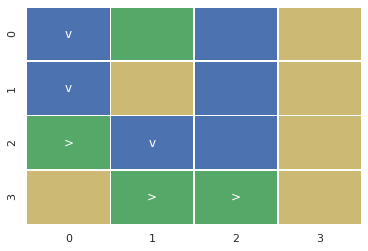

Total Reward:  1.0


In [15]:
# function for displaying a heatmap

def display_value_iteration(P, env = gym.make('FrozenLakeNotSlippery-v0')):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<', 
                              np.where(P==1, '>', 
                                       np.where(P==2, 'v', 
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             ) 
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    total_reward = 0
    s = env.reset()
    #env.render()
    done = False
    while done != True: 
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('v' if best_a==1 else ('>' if best_a==2 else '<'))   
        #print(s, best_a)
        s, rew, done, info = env.step(best_a) #take step using selected action
        total_reward = total_reward + rew
        visited_states[s] = 1 # mark the state as visited
        #env.render()
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 linewidth=0.5, 
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward)
    
# display heatmap for a 4x4 board
display_value_iteration(P_4)

In [16]:
V_8, P_8 = compute_value_iteration(env = gym.make('FrozenLake8x8NotSlippery-v0'))
V_8
#display_value_iteration(P_8, env = gym.make('FrozenLake8x8NotSlippery-v0'))

15  iterations done


array([0.25418658, 0.28242954, 0.3138106 , 0.34867844, 0.38742049,
       0.43046721, 0.4782969 , 0.531441  , 0.28242954, 0.3138106 ,
       0.34867844, 0.38742049, 0.43046721, 0.4782969 , 0.531441  ,
       0.59049   , 0.3138106 , 0.34867844, 0.38742049, 0.        ,
       0.4782969 , 0.531441  , 0.59049   , 0.6561    , 0.34867844,
       0.38742049, 0.43046721, 0.4782969 , 0.531441  , 0.        ,
       0.6561    , 0.729     , 0.3138106 , 0.34867844, 0.38742049,
       0.        , 0.59049   , 0.6561    , 0.729     , 0.81      ,
       0.28242954, 0.        , 0.        , 0.59049   , 0.6561    ,
       0.729     , 0.        , 0.9       , 0.3138106 , 0.        ,
       0.4782969 , 0.531441  , 0.        , 0.81      , 0.        ,
       1.        , 0.34867844, 0.38742049, 0.43046721, 0.        ,
       0.81      , 0.9       , 1.        , 0.        ])

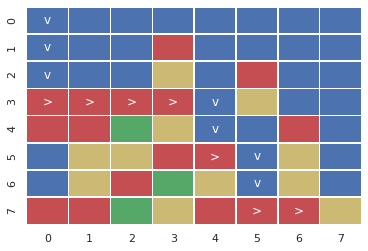

Total Reward:  1.0


In [17]:
display_value_iteration(P_8, env = gym.make('FrozenLake8x8NotSlippery-v0'))

In [0]:
# function for performing policy iteration
def compute_policy_iteration(env = gym.make('FrozenLakeNotSlippery-v0'), 
                            gamma=.9, v_delta_threshold=.01,
                            P = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    V = np.zeros([nb_states])
    # policy vector
    if P == None:
        P = np.random.choice(nb_actions, size=nb_states)
        
    max_iterations = 200000
    iteration = 0
    for i in range(max_iterations):
        
        # policy evaluation
        while True:
            v_delta = 0
            for s in range (0, nb_states):
                v_previous = V[s]                
                env.env.s = s # go to state s
                s_next, r, done, info = env.step(P[s]) #take the action recommended by policy
                V[s] = r + gamma * V[s_next] # update value after applying policy
                v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
            if v_delta < v_delta_threshold:
                break

        # policy improvement
        policy_stable = True
        for s in range (0, nb_states):
            a_old = P[s] # ask policy for action to perform
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward    
            P[s] = a_best # store the best action in the policy vector for the state
            if a_old != a_best:
                policy_stable = False
        
        if policy_stable:
            break
                
        iteration += 1
    if verbose:
        print (iteration,' iterations done')    
    return V, P
    

In [19]:
Vp_4, Pp_4 = compute_policy_iteration()
Vp_4

6  iterations done


array([0.59049, 0.6561 , 0.729  , 0.6561 , 0.6561 , 0.     , 0.81   ,
       0.     , 0.729  , 0.81   , 0.9    , 0.     , 0.     , 0.9    ,
       1.     , 0.     ])

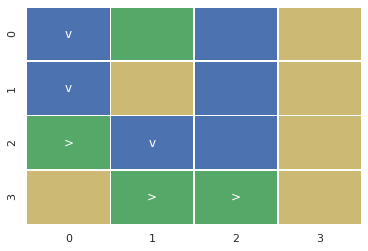

Total Reward:  1.0


In [20]:
display_value_iteration(Pp_4)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd


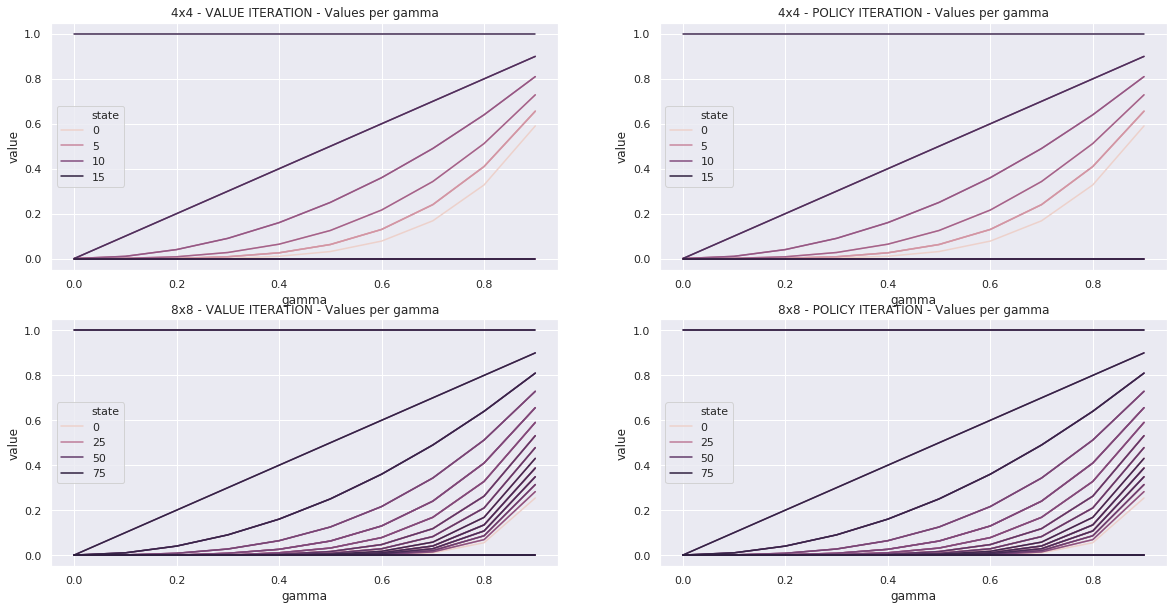

In [22]:
# function for performing value and policy iterations for given gamma

def gammas_training(method='value_iteration', 
                    gammas = np.arange(0, 1, 0.1),
                    env=gym.make('FrozenLakeNotSlippery-v0')):
    df = pd.DataFrame(columns=['gamma','state','value'])
    for gamma in gammas:
        if method == 'value_iteration':
            V, P = compute_value_iteration(env=env, gamma=gamma, verbose=False)
        else:
            V, P = compute_policy_iteration(env=env, gamma=gamma, verbose=False)
        df = df.append(pd.DataFrame({'gamma':[gamma for i in range(0,env.observation_space.n)],
                                'state':[i for i in range(0,env.observation_space.n)],
                                'value': V}))
    df.state=df.state.astype(int)
    return df
    
    
# display the values for multiple gammas

fig, ax = plt.subplots(2,2, figsize=(20,10))

df_4_v = gammas_training(method='value_iteration', env=gym.make('FrozenLakeNotSlippery-v0'))
sns.lineplot(data=df_4_v, x='gamma', y='value', hue='state', ax=ax[0][0])
ax[0][0].set_title('4x4 - VALUE ITERATION - Values per gamma')

df_4_i = gammas_training(method='policy_iteration', env=gym.make('FrozenLakeNotSlippery-v0'))
sns.lineplot(data=df_4_i, x='gamma', y='value', hue='state', ax=ax[0][1])
ax[0][1].set_title('4x4 - POLICY ITERATION - Values per gamma')

df_8_v = gammas_training(method='value_iteration', env=gym.make('FrozenLake8x8NotSlippery-v0'))
sns.lineplot(data=df_8_v, x='gamma', y='value', hue='state', ax=ax[1][0])
ax[1][0].set_title('8x8 - VALUE ITERATION - Values per gamma')

df_8_i = gammas_training(method='policy_iteration', env=gym.make('FrozenLake8x8NotSlippery-v0'))
sns.lineplot(data=df_8_i, x='gamma', y='value', hue='state', ax=ax[1][1])
ax[1][1].set_title('8x8 - POLICY ITERATION - Values per gamma');